In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

we Import all libraries here we use yfinance as a mean to import all the data we will be required to use for the following program
we use panbdas as a way to catagorize and use to clean the data
we use the the matplotlib library to plot the graph whihc the user might want to see to understand the program


In [2]:


portfolio = ['SUNPHARMA.NS','^NSEI','ESABINDIA.NS']
weighting1 = {'SUNPHARMA.NS': 25, 'TATAMOTORS.NS': 25, 'BAJFINANCE.NS': 50}
weighting2 = {'^NSEI':50,'^NSEBANK':50}
weighting3 = {'ESABINDIA.NS': 25, 'WAAREERTL.BO': 25, 'TIPSINDLTD.NS': 50}
ticker = yf.Ticker(portfolio[0])
basedata = ticker.history(period='max').reset_index()[['Date','Open']]
basedata['Date'] = pd.to_datetime(basedata['Date'])
basedata = basedata.rename(columns={'Open':portfolio[0]})

print(basedata)

                          Date  SUNPHARMA.NS
0    1996-01-01 00:00:00+05:30      1.417709
1    1996-01-02 00:00:00+05:30      1.408320
2    1996-01-03 00:00:00+05:30      1.363193
3    1996-01-04 00:00:00+05:30      1.365920
4    1996-01-05 00:00:00+05:30      1.359559
...                        ...           ...
7177 2024-07-29 00:00:00+05:30   1715.250000
7178 2024-07-30 00:00:00+05:30   1716.099976
7179 2024-07-31 00:00:00+05:30   1702.099976
7180 2024-08-01 00:00:00+05:30   1725.500000
7181 2024-08-02 00:00:00+05:30   1700.000000

[7182 rows x 2 columns]


we use weighting variabale so that we can we can use that and show how we can distribute the portfolio

The ticker function is used to to fetch the data from the yahoo finance

In [3]:
if (len(portfolio) > 1): # Compare the length of the list to 1
    for x in range(1,len(portfolio)):

      ticker = yf.Ticker(portfolio[x])
      newdata = ticker.history(period='max').reset_index()[['Date','Open']]
      newdata['Date'] = pd.to_datetime(newdata['Date'])
      newdata = newdata.rename(columns={'Open':portfolio[x]})
      basedata = pd.merge(basedata,newdata, on = 'Date')



print(basedata)

                          Date  SUNPHARMA.NS         ^NSEI  ESABINDIA.NS
0    2007-09-17 00:00:00+05:30     88.452874   4518.450195    312.323555
1    2007-09-18 00:00:00+05:30     88.364068   4494.100098    307.642163
2    2007-09-19 00:00:00+05:30     88.896915   4550.250000    307.642113
3    2007-09-20 00:00:00+05:30     89.252158   4734.850098    309.314097
4    2007-09-21 00:00:00+05:30     90.229035   4752.950195    320.950987
...                        ...           ...           ...           ...
4131 2024-07-29 00:00:00+05:30   1715.250000  24943.300781   6441.703429
4132 2024-07-30 00:00:00+05:30   1716.099976  24839.400391   6466.486324
4133 2024-07-31 00:00:00+05:30   1702.099976  24886.699219   6469.472341
4134 2024-08-01 00:00:00+05:30   1725.500000  25030.949219   6401.450195
4135 2024-08-02 00:00:00+05:30   1700.000000  24789.000000   6251.000000

[4136 rows x 4 columns]


In [4]:

basedata = basedata[basedata['Date'] >= '2004-02-14']  # Changed > to >=

for x in portfolio:
  basedata[x] = basedata[x] /( basedata[x].iloc[0])

print(basedata)

                          Date  SUNPHARMA.NS     ^NSEI  ESABINDIA.NS
0    2007-09-17 00:00:00+05:30      1.000000  1.000000      1.000000
1    2007-09-18 00:00:00+05:30      0.998996  0.994611      0.985011
2    2007-09-19 00:00:00+05:30      1.005020  1.007038      0.985011
3    2007-09-20 00:00:00+05:30      1.009036  1.047893      0.990364
4    2007-09-21 00:00:00+05:30      1.020080  1.051898      1.027623
...                        ...           ...       ...           ...
4131 2024-07-29 00:00:00+05:30     19.391682  5.520322     20.625096
4132 2024-07-30 00:00:00+05:30     19.401291  5.497327     20.704446
4133 2024-07-31 00:00:00+05:30     19.243015  5.507795     20.714007
4134 2024-08-01 00:00:00+05:30     19.507563  5.539720     20.496213
4135 2024-08-02 00:00:00+05:30     19.219274  5.486173     20.014501

[4136 rows x 4 columns]


In [5]:


def portfoliocalc(weighting,data,name):
  for ticker in weighting.keys():
        if ticker not in data.columns:
            ticker_data = yf.Ticker(ticker).history(period='max').reset_index()[['Date', 'Open']]
            ticker_data['Date'] = pd.to_datetime(ticker_data['Date'])
            ticker_data = ticker_data.rename(columns={'Open': ticker})
            # Merge the new ticker data with the existing data
            data = pd.merge(data, ticker_data, on='Date', how='left') # Add this line to merge the data
  # Calculate the weighted sum after all tickers are in the DataFrame
  data[name] = sum(data[x] * weighting[x] for x in list(weighting.keys()))
  return data

# Assuming basedata is already defined as in the user's code
basedata = portfoliocalc(weighting1,basedata,'Large_cap')
basedata = portfoliocalc(weighting2,basedata,'Mutual_Funds')
basedata = portfoliocalc(weighting3,basedata,'Small_cap')


ERROR:yfinance:WAAREERTL.BO: Period 'max' is invalid, must be one of ['1d', '5d']


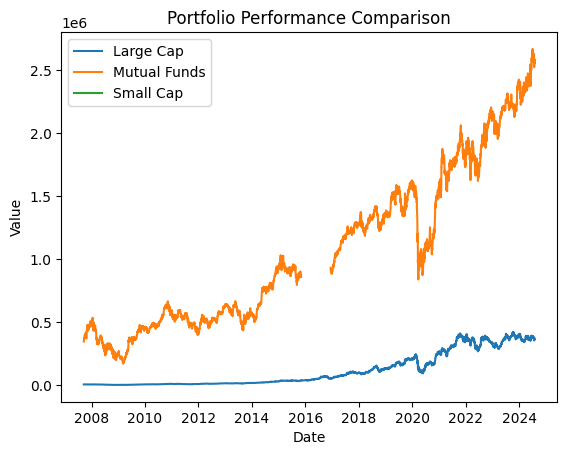

In [6]:
plt.plot(basedata['Date'], basedata['Large_cap'], label='Large Cap')
plt.plot(basedata['Date'], basedata['Mutual_Funds'], label='Mutual Funds')
plt.plot(basedata['Date'], basedata['Small_cap'], label='Small Cap')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Portfolio Performance Comparison')
plt.legend()
plt.show()
